<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 3 Hours </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> # Chin-Te LIAO  
<b> Student 2:</b> # Di HAO
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 

To generate your final report, use print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by April 7th 2017. 

# Introduction


In this session, your will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyper parameters. You will use the MNIST dataset which was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png",width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get restults. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command : 
from filename import *

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays.

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots
 








# Section 1 :  My First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the above Neural network with two inputs $X=(x1,x2)$, one hidden layers and a single output unit $(y)$.
The initial weights are set to random values. Neurons 6 and 7 represent the bias. Bias values are equal to 1.  
Training sample, X = (0.8, 0.2), whose class label is Y=0.4.

Assume that the neurons have a Sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$ and the learning rate $\mu$=1


<img src="Nimages/NN.png", width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$.

#Your answer goes here :

$w_{1,3}=  0.307$

$w_{1,4}=  -0.504$

$w_{2,3}= 0.802$

$w_{2,4}= 0.199$

$w_{6,3}= 0.208$

$w_{6,4}= -0.405$

$w_{3,5}= -0.638$

$w_{4,5}=  0.381$

$w_{7,5}=  0.458$



<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py </a> file) and reinitialise weights. 
Then you will to complete the Feed Forward and the Back-propagation functions. 

<b>Question 1.2.1</b>: Define the neural network corresponding to the one in part 1

In [1]:
from NeuralNetwork import *
#create the network
my_first_net =NeuralNetwork(2,2,1,iterations=1,learning_rate = 1)








<div class="alert alert-info"> We set the iterations to 1 to verify the computation we did in question 1.1.1, and the learning rate $\mu$=1 as required</div>

In [2]:
#Data preparation 
X=[0.8,0.2]
Y=[0.4]
data=[]
data.append(X)
data.append(Y)


#initialize weights
wi=np.array([[0.3,-0.5],[0.8,0.2],[0.2,-0.4]])
wo=np.array([[-0.6],[0.4],[0.5]])
my_first_net.weights_initialisation(wi,wo)
print(my_first_net.W_input_to_hidden)
print(my_first_net.W_hidden_to_output)
print(my_first_net.a_out)
print (my_first_net.a_hidden)






[[ 0.3 -0.5]
 [ 0.8  0.2]
 [ 0.2 -0.4]]
[[-0.6]
 [ 0.4]
 [ 0.5]]
[ 1.]
[ 1.  1.  1.]


<b>Question 1.2.2</b>: Implement the Feed Forward function (feedForward(X) in the NeuralNetwork.py file)



Check your network outputs the expected value (the one you computed in question 1.1)

In [3]:
#test my  Feed Forward function 
Output_activation=my_first_net.feedForward(X)
print("output activation =%.3f" %(Output_activation))






output activation =0.526


<div class="alert alert-info">The bias 1 in hidden layer also has to be transfered by the sigmoid function, if not, we get 0.56 as the output.</div>

<b>Question 1.2.3</b>: Implement the Back-propagation Algorithm (backPropagate(Y) in the NeuralNetwork.py file)  


In [4]:
# Implement it in the NeuralNetwork.py file and when finalised copy and paste your FeedForward function here

my_first_net.backPropagate(Y)












0.0061681844138093593

Check the gradient values and weight updates are correct (similar to the ones you computed in question 1.1)

In [5]:
#test my  Back-propagation function
my_first_net.backPropagate(Y)
#Print weights after backpropagation
print('wi_new=', my_first_net.W_input_to_hidden)
print('wo_new=', my_first_net.W_hidden_to_output)







('wi_new=', array([[ 0.30660427, -0.50406553],
       [ 0.80165107,  0.19898362],
       [ 0.20825534, -0.40508192]]))
('wo_new=', array([[-0.63830722],
       [ 0.38114492],
       [ 0.45823278]]))


<div class="alert alert-info"> We can see that the result we get is similar with the one we computed in question 1.1</div>

Your Feed Forward and Back-Propagation implementations are working, Great!! Let's tackle a real world problem.

# Section 2 : The MNIST Challenge! 

<b>Data Preparation</b>

The MNIST dataset consists of handwritten digit images it contains 60,000 examples for the training set and 10,000 examples for testing. In this Lab Session, the official training set of 60,000 is divided into an actual training set of 50,000 examples, 10,000 validation examples and 10,000 examples for test. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. The images are stored in byte form you will use the NumPy python library to read the data files into NumPy arrays that we will use to train the ANN.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the the load_data() function.


In [7]:
from utils import *
training_data, validation_data, test_data=load_data()







Loading MNIST data .....
Done.


<b>MNIST Dataset Digits Visualisation</b>

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


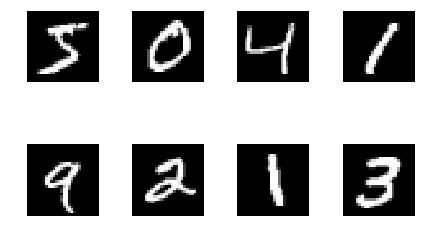

In [16]:
ROW = 2
COLUMN = 4
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = training_data[i][0].reshape(28, 28)
    print training_data[i][1]
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()


<div class="alert alert-info"> We can see the dataset is composed of 60000 images, each imgage has two elements, data[i][0] presents the image, whose shape is (784,), and data[i][1]records the label of this image, using the index of 1 in the array.  
So, the output of our model will also be an array with ten elements.</div>

<b>Part 1</b>: Creating the Neural Networks

The input layer of the neural network contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits, and so the input layer contains 784=28×28 neurons. The second layer of the network is a hidden layer, we set the neuron number in the hidden layer to 30. The output layer contains 10 neurons. 

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class

In [18]:
#create the network
from NeuralNetwork import * 
my_mnist_net = NeuralNetwork(784,30,10)




<b>Question 2.1.2</b>: Add the information about the performance of the neural network on the test set at each epoch

In [19]:
test_accuracy=my_mnist_net.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)




Test_Accuracy  8.39


<div class="alert alert-info"> Here, we can see before training, the test accuracy is only 8.39, considering we have ten different outputs, it seems like a random guess  .</div>

<b>Question 2.1.3</b>: Train the Neural Network and comment your findings

Iteration:  1/50[==============] -Error: 0.0079310271  -Training_Accuracy:  87.96  -time: 13.20 
Iteration:  2/50[==============] -Error: 0.0035505301  -Training_Accuracy:  90.42  -time: 25.92 
Iteration:  3/50[==============] -Error: 0.0029075025  -Training_Accuracy:  91.74  -time: 37.85 
Iteration:  4/50[==============] -Error: 0.0026164861  -Training_Accuracy:  92.54  -time: 50.06 
Iteration:  5/50[==============] -Error: 0.0024262844  -Training_Accuracy:  93.14  -time: 62.14 
Iteration:  6/50[==============] -Error: 0.0022718261  -Training_Accuracy:  93.56  -time: 75.25 
Iteration:  7/50[==============] -Error: 0.0021972447  -Training_Accuracy:  94.00  -time: 87.30 
Iteration:  8/50[==============] -Error: 0.0020751810  -Training_Accuracy:  94.19  -time: 101.38 
Iteration:  9/50[==============] -Error: 0.0019765068  -Training_Accuracy:  94.52  -time: 115.49 
Iteration: 10/50[==============] -Error: 0.0019199426  -Training_Accuracy:  94.82  -time: 127.66 
Iteration: 11/50[==========

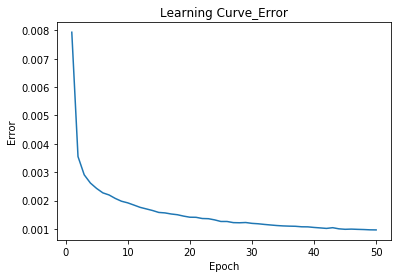

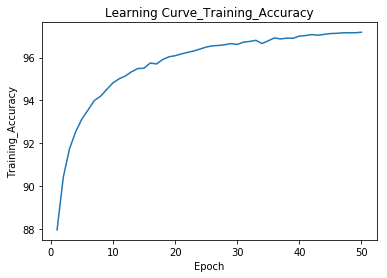

In [20]:
#train your network 
my_mnist_net.train(training_data,validation_data)









In [27]:
#save your model in Models/ using a distinguishing name for your model (architecture, learning rate, etc...)
my_mnist_net.save("Models/2layers_0.1learningrate")

In [28]:
test_accuracy=my_mnist_net.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)
validation_accuracy=my_mnist_net.predict(validation_data)/100
print('Validation_Accuracy  %-2.2f' % validation_accuracy)

Test_Accuracy  94.99
Validation_Accuracy  94.44


<div class="alert alert-info">After training, the test accuracy increases to **94.99**, and the validation accuracy is **94.44** .</div>

#Note your observations here. 

<b>Question 2.1.4</b>: Guess digit, Implement and test a python function that predict the class of a digit (the folder images_test contains some examples of images of digits)


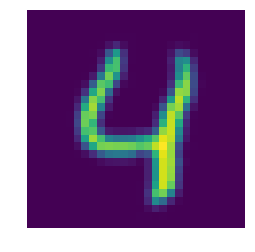

[[  1.35343425e-02   2.62526530e-04   9.10104952e-03   3.87129204e-04
    7.49934559e-01   6.62199799e-03   3.34771013e-02   3.89155822e-02
    5.23033397e-02   5.83592431e-02]]
4


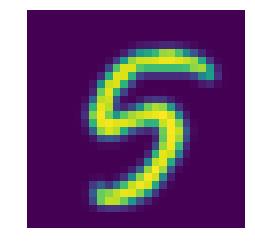

[[  1.74350411e-02   3.18535387e-05   1.87126188e-04   2.39762415e-02
    3.55180021e-01   9.35427364e-01   5.94908817e-03   7.41428085e-04
    9.49247923e-02   3.62982185e-02]]
5


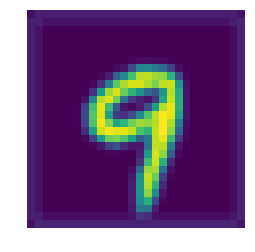

[[  3.73991964e-04   1.14106147e-03   3.94839858e-03   2.24222542e-04
    3.52223274e-01   3.44148645e-03   2.15271046e-03   2.31454374e-01
    1.33123678e-03   9.32763053e-01]]
9


In [40]:
#Your implementation goes here
import os
from scipy import misc
import PIL.ImageOps

    
path="Images_test/"
image= misc.imread(os.path.join(path,'4.bmp'), flatten=True)
image= misc.imresize(image,(28,28))
if(image[0][0]!=0):
    image= 255-image
plt.axis("off")
plt.imshow(image)
plt.show()
image=image.reshape(-1,784)

prediction = np.argmax(my_mnist_net.feedForward(image) )
print my_mnist_net.feedForward(image)
print prediction

image= misc.imread(os.path.join(path,'5.bmp'), flatten=True)
image= misc.imresize(image,(28,28))
if(image[0][0]!=0):
    image= 255-image
plt.axis("off")
plt.imshow(image)
plt.show()
image=image.reshape(-1,784)

prediction = np.argmax(my_mnist_net.feedForward(image) )
print my_mnist_net.feedForward(image)
print prediction
image= misc.imread(os.path.join(path,'9.bmp'), flatten=True)
image= misc.imresize(image,(28,28))
if(image[0][0]!=0):
    image= 255-image
plt.axis("off")
plt.imshow(image)
plt.show()
image=image.reshape(-1,784)

prediction = np.argmax(my_mnist_net.feedForward(image) )
print my_mnist_net.feedForward(image)
print prediction

<div class="alert alert-info">Here, we are going to predict the images of digits. Because the images in the dataset, which we used to train the model, are all with black background and white script, so the model will think the white pixel area is the script. So we need to make some preparation before prediction, that is, after the image has been proccessed to a gray image, judge whether the background is black, if not, reverse the colour.</div>

<b>Part 2</b>: Change the neural network structure and parameters to optimize performance

<b> Question 2.2.1</b>: Change the learning rate (0.001, 0.1, 1.0 , 10). Train the new neural nets with the original specifications (Part 2.1), for 50 iterations. 
Plot test accuracy vs iteration for each learning rate on the same graph. Report the maximum
test accuracy achieved for each learning rate. Which one achieves the maximum test accuracy?

In [38]:
#Your implementation with a learning rate of 0.1 goes here 


from NeuralNetwork import * 
my_mnist_net = NeuralNetwork(784,30,10,learning_rate = 0.1)
start_time = time.time()
errors_4=[]
Training_accuracies_4=[]

for it in range(my_mnist_net.iterations):
    np.random.shuffle(training_data)
    inputs  = [entry[0] for entry in training_data ]
    targets = [ entry[1] for entry in training_data ]
            
    error=0.0 
    for i in range(len(inputs)):
        Input = inputs[i]
        Target = targets[i]
        my_mnist_net.feedForward(Input)
        error+=my_mnist_net.backPropagate(Target)
    Training_accuracies_4.append(my_mnist_net.predict(training_data))
            
    error=error/len(training_data)
    errors_4.append(error)
            
    print("Iteration: %2d/%2d[==============] -Error: %5.10f  -Training_Accuracy:  %2.2f  -time: %2.2f " %(it+1,my_mnist_net.iterations, error, (my_mnist_net.predict(training_data)/len(training_data))*100, time.time() - start_time))
            # you can add test_accuracy and validation accuracy for visualisation 

test_accuracy=my_mnist_net.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)
validation_accuracy=my_mnist_net.predict(validation_data)/100
print('Validation_Accuracy  %-2.2f' % validation_accuracy)


Iteration:  1/50[==============] -Error: 0.0080403166  -Training_Accuracy:  87.33  -time: 15.87 
Iteration:  2/50[==============] -Error: 0.0039349978  -Training_Accuracy:  90.41  -time: 30.29 
Iteration:  3/50[==============] -Error: 0.0033083438  -Training_Accuracy:  91.73  -time: 44.90 
Iteration:  4/50[==============] -Error: 0.0029321770  -Training_Accuracy:  92.68  -time: 59.33 
Iteration:  5/50[==============] -Error: 0.0026624708  -Training_Accuracy:  93.22  -time: 72.54 
Iteration:  6/50[==============] -Error: 0.0024795199  -Training_Accuracy:  93.71  -time: 85.46 
Iteration:  7/50[==============] -Error: 0.0024222395  -Training_Accuracy:  94.03  -time: 100.91 
Iteration:  8/50[==============] -Error: 0.0022458347  -Training_Accuracy:  94.34  -time: 116.54 
Iteration:  9/50[==============] -Error: 0.0021502346  -Training_Accuracy:  94.60  -time: 129.29 
Iteration: 10/50[==============] -Error: 0.0020831974  -Training_Accuracy:  94.77  -time: 142.46 
Iteration: 11/50[=========

In [39]:
#Your implementation with a learning rate of 0.001 goes here 


from NeuralNetwork import * 
my_mnist_net = NeuralNetwork(784,30,10,learning_rate = 0.001)
start_time = time.time()
errors_1=[]
Training_accuracies_1=[]
for it in range(my_mnist_net.iterations):
    np.random.shuffle(training_data)
    inputs  = [entry[0] for entry in training_data ]
    targets = [ entry[1] for entry in training_data ]
            
    error=0.0 
    for i in range(len(inputs)):
        Input = inputs[i]
        Target = targets[i]
        my_mnist_net.feedForward(Input)
        error+=my_mnist_net.backPropagate(Target)
    Training_accuracies_1.append(my_mnist_net.predict(training_data))
            
    error=error/len(training_data)
    errors_1.append(error)
            
    print("Iteration: %2d/%2d[==============] -Error: %5.10f  -Training_Accuracy:  %2.2f  -time: %2.2f " %(it+1,my_mnist_net.iterations, error, (my_mnist_net.predict(training_data)/len(training_data))*100, time.time() - start_time))
            # you can add test_accuracy and validation accuracy for visualisation 
            
time_list.append((time.time() - start_time))
test_accuracy=my_mnist_net.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)
validation_accuracy=my_mnist_net.predict(validation_data)/100
print('Validation_Accuracy  %-2.2f' % validation_accuracy)



Iteration:  1/50[==============] -Error: 0.0474954677  -Training_Accuracy:  40.09  -time: 13.80 
Iteration:  2/50[==============] -Error: 0.0363963682  -Training_Accuracy:  49.03  -time: 29.37 
Iteration:  3/50[==============] -Error: 0.0308182137  -Training_Accuracy:  55.34  -time: 43.17 
Iteration:  4/50[==============] -Error: 0.0262895736  -Training_Accuracy:  58.80  -time: 58.44 
Iteration:  5/50[==============] -Error: 0.0228597435  -Training_Accuracy:  61.52  -time: 72.69 
Iteration:  6/50[==============] -Error: 0.0203031963  -Training_Accuracy:  64.13  -time: 85.15 
Iteration:  7/50[==============] -Error: 0.0183720354  -Training_Accuracy:  66.17  -time: 97.74 
Iteration:  8/50[==============] -Error: 0.0169191173  -Training_Accuracy:  67.73  -time: 110.56 
Iteration:  9/50[==============] -Error: 0.0157707732  -Training_Accuracy:  69.01  -time: 122.36 
Iteration: 10/50[==============] -Error: 0.0148471067  -Training_Accuracy:  70.25  -time: 135.55 
Iteration: 11/50[==========

<div class="alert alert-info">here, we noticed that though the training_accuracy keeps increasing, which proves that the change of weights is heading the right direction, but each epoch make small improvement, it also begins with a very low weight, so after 50 iterations, the training accuracy only reaches 83.76%, but after more iterations, it will get better result.</div>

In [41]:
#Your implementation with a learning rate of 1.0 goes here 


from NeuralNetwork import * 
my_mnist_net = NeuralNetwork(784,30,10,learning_rate = 1.0)

start_time = time.time()
errors_2=[]
Training_accuracies_2=[]
for it in range(my_mnist_net.iterations):
    np.random.shuffle(training_data)
    inputs  = [entry[0] for entry in training_data ]
    targets = [ entry[1] for entry in training_data ]
    error=0.0 
    for i in range(len(inputs)):
        Input = inputs[i]
        Target = targets[i]
        my_mnist_net.feedForward(Input)
        error+=my_mnist_net.backPropagate(Target)
    Training_accuracies_2.append(my_mnist_net.predict(training_data))
            
    error=error/len(training_data)
    errors_2.append(error)
            
    print("Iteration: %2d/%2d[==============] -Error: %5.10f  -Training_Accuracy:  %2.2f  -time: %2.2f " %(it+1,my_mnist_net.iterations, error, (my_mnist_net.predict(training_data)/len(training_data))*100, time.time() - start_time))
# you can add test_accuracy and validation accuracy for visualisation 
time_list.append((time.time() - start_time))
test_accuracy=my_mnist_net.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)
validation_accuracy=my_mnist_net.predict(validation_data)/100
print('Validation_Accuracy  %-2.2f' % validation_accuracy)











Iteration:  1/50[==============] -Error: 0.0024665309  -Training_Accuracy:  90.85  -time: 14.82 
Iteration:  2/50[==============] -Error: 0.0021310080  -Training_Accuracy:  92.96  -time: 27.99 
Iteration:  3/50[==============] -Error: 0.0020790156  -Training_Accuracy:  93.15  -time: 44.53 
Iteration:  4/50[==============] -Error: 0.0021981694  -Training_Accuracy:  93.81  -time: 59.45 
Iteration:  5/50[==============] -Error: 0.0021147107  -Training_Accuracy:  94.15  -time: 72.15 
Iteration:  6/50[==============] -Error: 0.0020171673  -Training_Accuracy:  93.36  -time: 87.71 
Iteration:  7/50[==============] -Error: 0.0020215267  -Training_Accuracy:  94.60  -time: 102.91 
Iteration:  8/50[==============] -Error: 0.0021336434  -Training_Accuracy:  94.79  -time: 116.79 
Iteration:  9/50[==============] -Error: 0.0022907398  -Training_Accuracy:  94.47  -time: 129.75 
Iteration: 10/50[==============] -Error: 0.0020493561  -Training_Accuracy:  94.73  -time: 142.19 
Iteration: 11/50[=========

<div class="alert alert-info">Here, we noticed that with learning rate=1, thought it gets good result,it also has vibration, which means it also larger than the optimal one, so we would like to decrease it a little bit to get a better performance.</div>

In [43]:
#Your implementation with a learning rate of 0.15 goes here 


from NeuralNetwork import * 
my_mnist_net = NeuralNetwork(784,30,10,learning_rate = 0.15)
start_time = time.time()
errors_5=[]
Training_accuracies_5=[]
for it in range(my_mnist_net.iterations):
    np.random.shuffle(training_data)
    inputs  = [entry[0] for entry in training_data ]
    targets = [ entry[1] for entry in training_data ]
            
    error=0.0 
    for i in range(len(inputs)):
        Input = inputs[i]
        Target = targets[i]
        my_mnist_net.feedForward(Input)
        error+=my_mnist_net.backPropagate(Target)
    Training_accuracies_5.append(my_mnist_net.predict(training_data))
            
    error=error/len(training_data)
    errors_5.append(error)
            
    print("Iteration: %2d/%2d[==============] -Error: %5.10f  -Training_Accuracy:  %2.2f  -time: %2.2f " %(it+1,my_mnist_net.iterations, error, (my_mnist_net.predict(training_data)/len(training_data))*100, time.time() - start_time))
            # you can add test_accuracy and validation accuracy for visualisation 
            

test_accuracy=my_mnist_net.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)
validation_accuracy=my_mnist_net.predict(validation_data)/100
print('Validation_Accuracy  %-2.2f' % validation_accuracy)


        

Iteration:  1/50[==============] -Error: 0.0063197295  -Training_Accuracy:  88.50  -time: 15.72 
Iteration:  2/50[==============] -Error: 0.0035270498  -Training_Accuracy:  91.30  -time: 32.24 
Iteration:  3/50[==============] -Error: 0.0027886205  -Training_Accuracy:  92.31  -time: 45.22 
Iteration:  4/50[==============] -Error: 0.0023818243  -Training_Accuracy:  93.31  -time: 57.88 
Iteration:  5/50[==============] -Error: 0.0022342699  -Training_Accuracy:  93.84  -time: 70.92 
Iteration:  6/50[==============] -Error: 0.0020219291  -Training_Accuracy:  94.34  -time: 84.10 
Iteration:  7/50[==============] -Error: 0.0018844230  -Training_Accuracy:  94.52  -time: 96.60 
Iteration:  8/50[==============] -Error: 0.0018149914  -Training_Accuracy:  94.82  -time: 108.78 
Iteration:  9/50[==============] -Error: 0.0017099361  -Training_Accuracy:  95.08  -time: 126.87 
Iteration: 10/50[==============] -Error: 0.0016662033  -Training_Accuracy:  95.25  -time: 143.60 
Iteration: 11/50[==========

In [44]:
#Your implementation with a learning rate of 10 goes here 

from NeuralNetwork import * 

my_mnist_net = NeuralNetwork(784,30,10,learning_rate = 10)
start_time = time.time()
errors_3=[]
Training_accuracies_3=[]
for it in range(my_mnist_net.iterations):
    np.random.shuffle(training_data)
    inputs  = [entry[0] for entry in training_data ]
    targets = [ entry[1] for entry in training_data ]
    error=0.0 
    for i in range(len(inputs)):
        Input = inputs[i]
        Target = targets[i]
        my_mnist_net.feedForward(Input)
        error+=my_mnist_net.backPropagate(Target)
    Training_accuracies_3.append(my_mnist_net.predict(training_data))
            
    error=error/len(training_data)
    errors_3.append(error)
            
    print("Iteration: %2d/%2d[==============] -Error: %5.10f  -Training_Accuracy:  %2.2f  -time: %2.2f " %(it+1,my_mnist_net.iterations, error, (my_mnist_net.predict(training_data)/len(training_data))*100, time.time() - start_time))
# you can add test_accuracy and validation accuracy for visualisation 
time_list.append((time.time() - start_time))
test_accuracy=my_mnist_net.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)
validation_accuracy=my_mnist_net.predict(validation_data)/100
print('Validation_Accuracy  %-2.2f' % validation_accuracy)




















Iteration:  1/50[==============] -Error: 0.0480359358  -Training_Accuracy:  11.83  -time: 14.17 
Iteration:  2/50[==============] -Error: 0.0493099886  -Training_Accuracy:  15.43  -time: 26.92 
Iteration:  3/50[==============] -Error: 0.0493099853  -Training_Accuracy:  12.92  -time: 40.06 
Iteration:  4/50[==============] -Error: 0.0493099834  -Training_Accuracy:  10.10  -time: 54.57 
Iteration:  5/50[==============] -Error: 0.0493099802  -Training_Accuracy:  12.15  -time: 72.82 
Iteration:  6/50[==============] -Error: 0.0493099752  -Training_Accuracy:  11.41  -time: 90.08 
Iteration:  7/50[==============] -Error: 0.0493098474  -Training_Accuracy:  20.20  -time: 104.39 
Iteration:  8/50[==============] -Error: 0.0492609947  -Training_Accuracy:  21.22  -time: 118.59 
Iteration:  9/50[==============] -Error: 0.0493024463  -Training_Accuracy:  9.40  -time: 133.58 
Iteration: 10/50[==============] -Error: 0.0492858468  -Training_Accuracy:  15.73  -time: 146.48 
Iteration: 11/50[==========

<div class="alert alert-info">Here, we noticed that because the learning rate is too large, it can't converge ,so it has bad performance.</div>


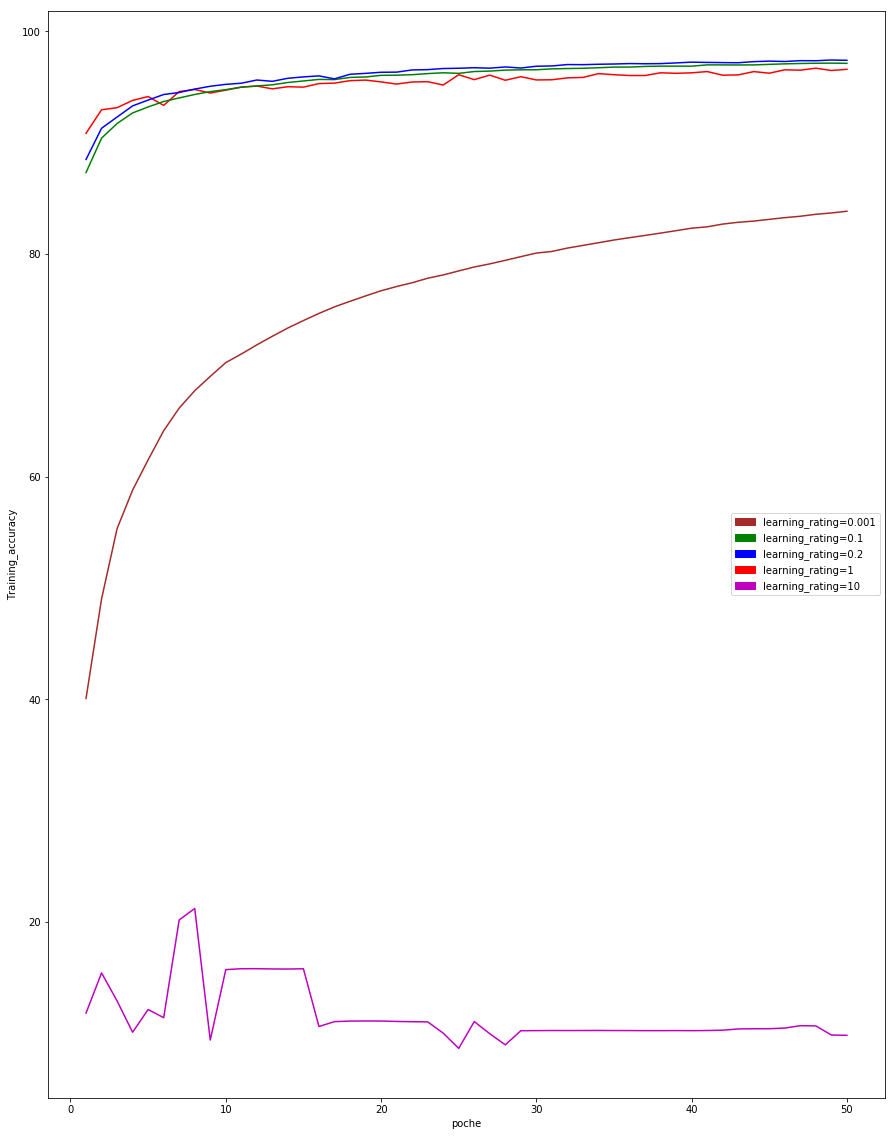

In [61]:
import matplotlib.patches as mpatches
plt.figure(figsize=(15,20))
blue_patch = mpatches.Patch(color='b', label='learning_rating=0.2')
red_patch = mpatches.Patch(color='r', label='learning_rating=1')
purple_patch = mpatches.Patch(color='m', label='learning_rating=10')
green_patch = mpatches.Patch(color='g', label='learning_rating=0.1')
brown_patch = mpatches.Patch(color='brown', label='learning_rating=0.001')
plt.legend(handles=[brown_patch,green_patch,blue_patch,red_patch,purple_patch])
plt.plot(range(1,my_mnist_net.iterations+1), Training_accuracies_1,'brown') 
plt.plot(range(1,my_mnist_net.iterations+1), Training_accuracies_2,'r') 
plt.plot(range(1,my_mnist_net.iterations+1), Training_accuracies_3,'m') 
plt.plot(range(1,my_mnist_net.iterations+1), Training_accuracies_4,'g')
plt.plot(range(1,my_mnist_net.iterations+1), Training_accuracies_5,'b')
plt.xlabel('poche')
plt.ylabel('Training_accuracy')
plt.show()

<div class="alert alert-info">From the graph, we notice that with suitable learning rate, the accuracy not only ends with a high value, but also begins with a relative high value. At the begining, it improves fast, and then slow down.  
The learning rate which is smaller than the optimal one will not viberate, but improve slowly, on the contrary, the learning rate which is larger (but not too much larger) than the optimal one will improve fast but also viberate at the end.  
When the learning rate is too high, it can't converge anymore, so it has bad performance, keeping viberating.</div>

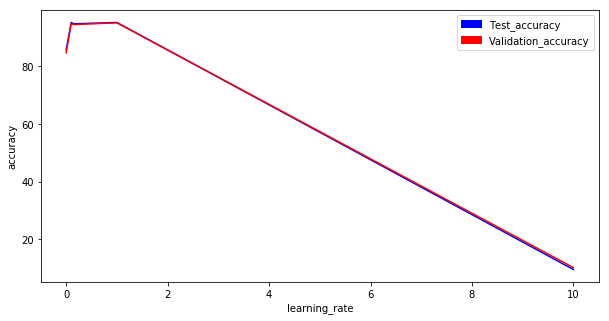

In [86]:
plt.figure(figsize=(10,5))
x=[0.001,0.1,0.15,1,10]
test=[85.81,95.21,94.73,95.20,9.56]
validation=[84.68,94.82,94.47,95.10,10.21]
plt.plot(x,test,'b-')
plt.plot(x,validation,'r-')
plt.xlabel('learning_rate')
plt.ylabel('accuracy')
blue_patch = mpatches.Patch(color='b', label='Test_accuracy')
red_patch = mpatches.Patch(color='r', label='Validation_accuracy')
plt.legend(handles=[blue_patch,red_patch])
plt.show()

<div class="alert alert-info">From the graph of learning rate verse accuracy, we can see the **maximum**
test accuracy is **95.21%**, which is achieved by **learning rate=0.1**.  
At the same time, when the **learning rate=1.0**, the model also gets good result, whose test accuracy is **95.20%**, and it has the best result in validation accuracy.  
The test accuracy of **learning rate=0.001** is **85.81%**.  
The model with **learning rate=0.15** has the best reslut in training accuracy, but it doesn't behave that remarkably in test accuracy and validation accuracy, whose test accuracy is **94.73%**.  
**Learning rate =10** is obviously too large, which makes the test accuracy of the model very low, only **9.56%**, seems like a random guess. </div>

#Your answer for Question 2.2.1 goes here

 <b> Question 2.2.2 : </b> initialize all weights to 0.  Plot the training accuracy curve.
Comment your results
    
        

Iteration:  1/50[==============] -Error: 0.0420943146  -Training_Accuracy:  31.21  -time: 14.33 
Iteration:  2/50[==============] -Error: 0.0098695231  -Training_Accuracy:  43.31  -time: 27.91 
Iteration:  3/50[==============] -Error: 0.0088403627  -Training_Accuracy:  39.07  -time: 46.94 
Iteration:  4/50[==============] -Error: 0.0084525354  -Training_Accuracy:  43.20  -time: 59.78 
Iteration:  5/50[==============] -Error: 0.0081879089  -Training_Accuracy:  42.43  -time: 72.06 
Iteration:  6/50[==============] -Error: 0.0083919337  -Training_Accuracy:  42.32  -time: 84.58 
Iteration:  7/50[==============] -Error: 0.0082086018  -Training_Accuracy:  43.16  -time: 96.87 
Iteration:  8/50[==============] -Error: 0.0081255348  -Training_Accuracy:  42.89  -time: 109.06 
Iteration:  9/50[==============] -Error: 0.0082364077  -Training_Accuracy:  44.00  -time: 125.94 
Iteration: 10/50[==============] -Error: 0.0082581428  -Training_Accuracy:  42.00  -time: 138.16 
Iteration: 11/50[==========

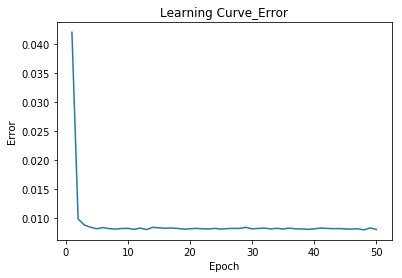

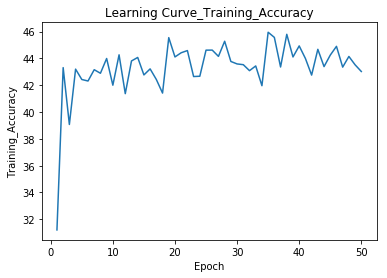

In [89]:
#Your implementation goes here


from NeuralNetwork import * 
my_mnist_net = NeuralNetwork(784,30,10)
wi=np.zeros(shape=(my_mnist_net.input, my_mnist_net.hidden-1))
wo=np.zeros(shape=(my_mnist_net.hidden, my_mnist_net.output))
my_mnist_net.weights_initialisation(wi,wo)
my_mnist_net.train(training_data,validation_data)















<div class="alert alert-info">When the initial weight equals to zero, it always give the same output because of the symmetric weights, which will prevent the network from learning. From the result, we can also see that  makes the neural network have very bad performance.</div>

#Your answer goes here

<b> Question 2.2.3 : </b> Try with a different transfer function (such as tanh).
 File transfer_functions.py provides you the python implementation of the tanh function and its derivative

Iteration:  1/50[==============] -Error: 0.1396568352  -Training_Accuracy:  73.45  -time: 11.59 
Iteration:  2/50[==============] -Error: 0.1321350263  -Training_Accuracy:  72.81  -time: 22.14 
Iteration:  3/50[==============] -Error: 0.1323673712  -Training_Accuracy:  67.83  -time: 32.94 
Iteration:  4/50[==============] -Error: 0.1322623182  -Training_Accuracy:  79.50  -time: 43.13 
Iteration:  5/50[==============] -Error: 0.1325345965  -Training_Accuracy:  81.71  -time: 52.94 
Iteration:  6/50[==============] -Error: 0.1311304225  -Training_Accuracy:  84.43  -time: 63.92 
Iteration:  7/50[==============] -Error: 0.1321394237  -Training_Accuracy:  80.42  -time: 75.78 
Iteration:  8/50[==============] -Error: 0.1323728040  -Training_Accuracy:  63.06  -time: 86.09 
Iteration:  9/50[==============] -Error: 0.1321911140  -Training_Accuracy:  87.03  -time: 95.90 
Iteration: 10/50[==============] -Error: 0.1326521478  -Training_Accuracy:  86.03  -time: 106.61 
Iteration: 11/50[============

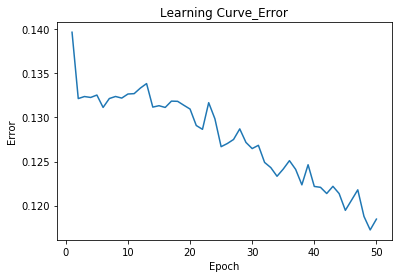

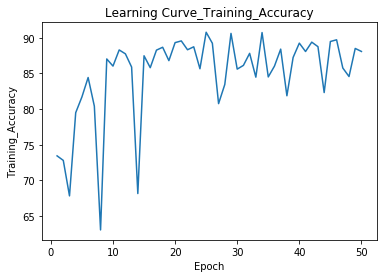

In [90]:
#Your implementation goes here


my_mnist_net = NeuralNetwork_tanh(784,30,10)
my_mnist_net.train(training_data,validation_data)




In [91]:
my_mnist_net.save("Models/2layer_tanh")

<div class="alert alert-info">We noticed that the same learning rate, which won't cause viberation in sigmoid-transfered neural network may cause viberation in tanh transfered one, we suppose that because tanh function is steeper than sigmoid function.  
So we need to choose different learning rate according to different transfer function.</div>

#Your answer goes here


<b> Question 2.2.4 : </b>  Add more neurons in the hidden layer (try with 100, 200, 300). Plot the curve representing the validation accuracy versus the number of neurons in the hidden layer.  (Choose and justify other hyper-parameters)

In [79]:
#Your implementation goes here

#has 100 neurons in the hidden layer
from NeuralNetwork import * 
my_mnist_net = NeuralNetwork(784,100,10)

start_time = time.time()
errors_6=[]
Training_accuracies_6=[]
for it in range(my_mnist_net.iterations):
    np.random.shuffle(training_data)
    inputs  = [entry[0] for entry in training_data ]
    targets = [ entry[1] for entry in training_data ]
    error=0.0 
    for i in range(len(inputs)):
        Input = inputs[i]
        Target = targets[i]
        my_mnist_net.feedForward(Input)
        error+=my_mnist_net.backPropagate(Target)
    Training_accuracies_6.append((my_mnist_net.predict(training_data)/len(training_data))*100)
            
    error=error/len(training_data)
    errors_6.append(error)
            
    print("Iteration: %2d/%2d[==============] -Error: %5.10f  -Training_Accuracy:  %2.2f  -time: %2.2f " %(it+1,my_mnist_net.iterations, error, (my_mnist_net.predict(training_data)/len(training_data))*100, time.time() - start_time))
# you can add test_accuracy and validation accuracy for visualisation 
test_accuracy=my_mnist_net.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)
validation_accuracy=my_mnist_net.predict(validation_data)/100
print('Validation_Accuracy  %-2.2f' % validation_accuracy)


Iteration:  1/50[==============] -Error: 0.0047786256  -Training_Accuracy:  89.69  -time: 30.69 
Iteration:  2/50[==============] -Error: 0.0028334865  -Training_Accuracy:  91.94  -time: 51.93 
Iteration:  3/50[==============] -Error: 0.0024274641  -Training_Accuracy:  93.30  -time: 72.81 
Iteration:  4/50[==============] -Error: 0.0020730840  -Training_Accuracy:  94.02  -time: 93.96 
Iteration:  5/50[==============] -Error: 0.0018996686  -Training_Accuracy:  94.55  -time: 115.24 
Iteration:  6/50[==============] -Error: 0.0017719084  -Training_Accuracy:  94.70  -time: 135.94 
Iteration:  7/50[==============] -Error: 0.0016531026  -Training_Accuracy:  95.28  -time: 156.63 
Iteration:  8/50[==============] -Error: 0.0015794276  -Training_Accuracy:  95.66  -time: 179.78 
Iteration:  9/50[==============] -Error: 0.0014918214  -Training_Accuracy:  95.95  -time: 200.44 
Iteration: 10/50[==============] -Error: 0.0014151271  -Training_Accuracy:  96.13  -time: 221.32 
Iteration: 11/50[=======

In [80]:
my_mnist_net.save("Models/2layers_100neurals")

In [78]:
#has 200 neurons in the hidden layer
from NeuralNetwork import * 
my_mnist_net = NeuralNetwork(784,200,10)

start_time = time.time()
errors_7=[]
Training_accuracies_7=[]
for it in range(my_mnist_net.iterations):
    np.random.shuffle(training_data)
    inputs  = [entry[0] for entry in training_data ]
    targets = [ entry[1] for entry in training_data ]
    error=0.0 
    for i in range(len(inputs)):
        Input = inputs[i]
        Target = targets[i]
        my_mnist_net.feedForward(Input)
        error+=my_mnist_net.backPropagate(Target)
    Training_accuracies_7.append((my_mnist_net.predict(training_data)/len(training_data))*100)
            
    error=error/len(training_data)
    errors_7.append(error)
            
    print("Iteration: %2d/%2d[==============] -Error: %5.10f  -Training_Accuracy:  %2.2f  -time: %2.2f " %(it+1,my_mnist_net.iterations, error, (my_mnist_net.predict(training_data)/len(training_data))*100, time.time() - start_time))
# you can add test_accuracy and validation accuracy for visualisation 
test_accuracy=my_mnist_net.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)
validation_accuracy=my_mnist_net.predict(validation_data)/100
print('Validation_Accuracy  %-2.2f' % validation_accuracy)



Iteration:  1/50[==============] -Error: 0.0030042174  -Training_Accuracy:  91.50  -time: 46.74 
Iteration:  2/50[==============] -Error: 0.0020556592  -Training_Accuracy:  93.12  -time: 95.33 
Iteration:  3/50[==============] -Error: 0.0017399926  -Training_Accuracy:  94.11  -time: 143.13 
Iteration:  4/50[==============] -Error: 0.0015713737  -Training_Accuracy:  94.96  -time: 189.68 
Iteration:  5/50[==============] -Error: 0.0013418632  -Training_Accuracy:  95.42  -time: 238.89 
Iteration:  6/50[==============] -Error: 0.0012726450  -Training_Accuracy:  95.94  -time: 291.50 
Iteration:  7/50[==============] -Error: 0.0011494182  -Training_Accuracy:  96.23  -time: 344.32 
Iteration:  8/50[==============] -Error: 0.0010265593  -Training_Accuracy:  96.61  -time: 395.91 
Iteration:  9/50[==============] -Error: 0.0010071348  -Training_Accuracy:  96.88  -time: 440.87 
Iteration: 10/50[==============] -Error: 0.0009359889  -Training_Accuracy:  97.05  -time: 486.09 
Iteration: 11/50[=====

In [76]:
#has 300 neurons in the hidden layer
from NeuralNetwork import * 
my_mnist_net = NeuralNetwork(784,300,10)

start_time = time.time()
errors_8=[]
Training_accuracies_8=[]
for it in range(my_mnist_net.iterations):
    np.random.shuffle(training_data)
    inputs  = [entry[0] for entry in training_data ]
    targets = [ entry[1] for entry in training_data ]
    error=0.0 
    for i in range(len(inputs)):
        Input = inputs[i]
        Target = targets[i]
        my_mnist_net.feedForward(Input)
        error+=my_mnist_net.backPropagate(Target)
    Training_accuracies_8.append((my_mnist_net.predict(training_data)/len(training_data))*100)
            
    error=error/len(training_data)
    errors_8.append(error)
            
    print("Iteration: %2d/%2d[==============] -Error: %5.10f  -Training_Accuracy:  %2.2f  -time: %2.2f " %(it+1,my_mnist_net.iterations, error, (my_mnist_net.predict(training_data)/len(training_data))*100, time.time() - start_time))
# you can add test_accuracy and validation accuracy for visualisation 
test_accuracy=my_mnist_net.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)
validation_accuracy=my_mnist_net.predict(validation_data)/100
print('Validation_Accuracy  %-2.2f' % validation_accuracy)


Iteration:  1/50[==============] -Error: 0.0025552141  -Training_Accuracy:  91.69  -time: 72.88 
Iteration:  2/50[==============] -Error: 0.0017944565  -Training_Accuracy:  93.62  -time: 137.07 
Iteration:  3/50[==============] -Error: 0.0015258260  -Training_Accuracy:  94.66  -time: 200.78 
Iteration:  4/50[==============] -Error: 0.0013567781  -Training_Accuracy:  95.27  -time: 264.97 
Iteration:  5/50[==============] -Error: 0.0011290697  -Training_Accuracy:  96.01  -time: 328.76 
Iteration:  6/50[==============] -Error: 0.0010386002  -Training_Accuracy:  96.35  -time: 392.63 
Iteration:  7/50[==============] -Error: 0.0009369399  -Training_Accuracy:  96.48  -time: 457.71 
Iteration:  8/50[==============] -Error: 0.0008712260  -Training_Accuracy:  96.92  -time: 520.81 
Iteration:  9/50[==============] -Error: 0.0007745627  -Training_Accuracy:  97.17  -time: 583.75 
Iteration: 10/50[==============] -Error: 0.0007266999  -Training_Accuracy:  97.31  -time: 646.34 
Iteration: 11/50[====

<div class="alert alert-info">It really time-consuming! And the improvement is limited since it has already reached a good training accuracy with less neurons.</div>

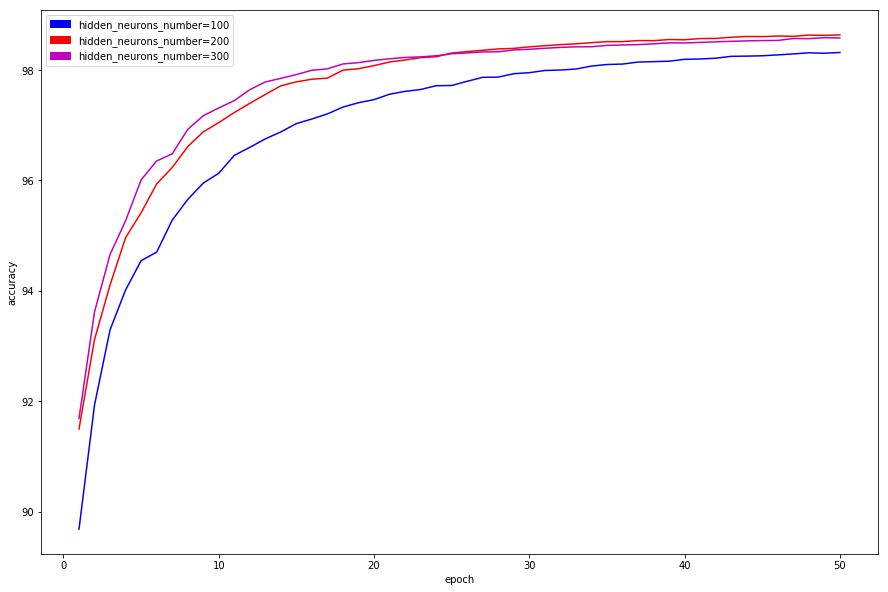

In [96]:
plt.figure(figsize=(15,10))
blue_patch = mpatches.Patch(color='b', label='hidden_neurons_number=100')
red_patch = mpatches.Patch(color='r', label='hidden_neurons_number=200')
purple_patch = mpatches.Patch(color='m', label='hidden_neurons_number=300')
plt.legend(handles=[blue_patch,red_patch,purple_patch])
plt.plot(range(1,my_mnist_net.iterations+1), Training_accuracies_6,'b') 
plt.plot(range(1,my_mnist_net.iterations+1), Training_accuracies_7,'r') 
plt.plot(range(1,my_mnist_net.iterations+1), Training_accuracies_8,'m') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

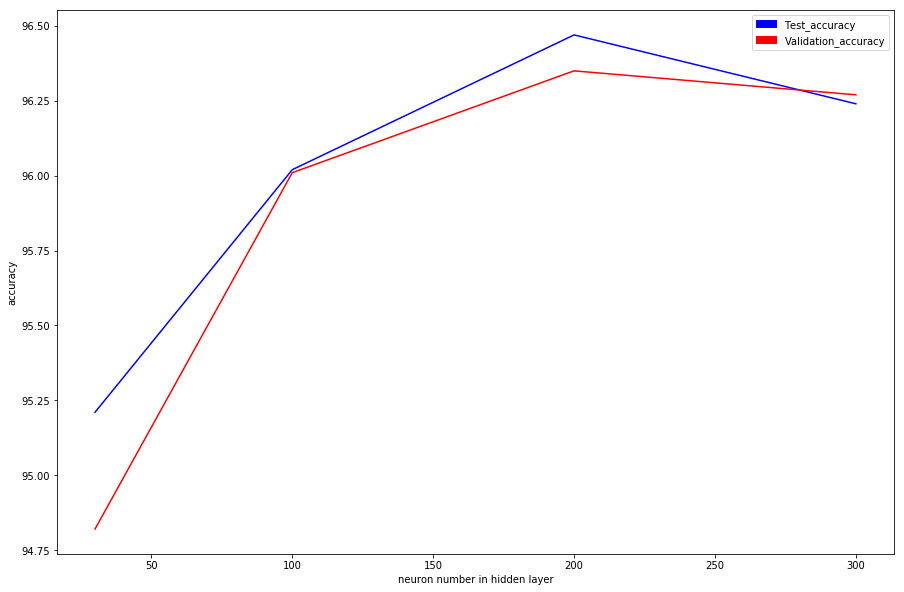

In [98]:
plt.figure(figsize=(15,10))
x=[30,100,200,300]
test=[95.21,96.02,96.47,96.24]
validation=[94.82,96.01,96.35,96.27]
plt.plot(x,test,'b-')
plt.plot(x,validation,'r-')
plt.xlabel('neuron number in hidden layer')
plt.ylabel('accuracy')
blue_patch = mpatches.Patch(color='b', label='Test_accuracy')
red_patch = mpatches.Patch(color='r', label='Validation_accuracy')
plt.legend(handles=[blue_patch,red_patch])
plt.show()

<div class="alert alert-info">This graph presents the relationship between the neuron number and accuracy.  
Indeed, more neurons will produce more accurate result, but when the accuracy has already reached a very high value, the increase of the neurons becomes helpless.  
In this case, we noticed that the network with 200 neurons even behaves better than that with 300 neurons, no matter in training accuracy, test accuracy or validation accuracy.</div>

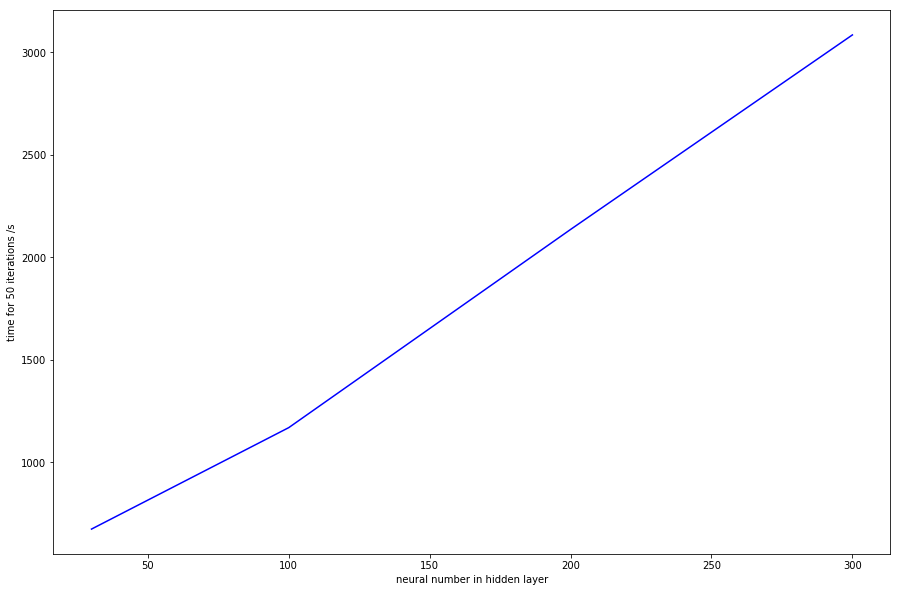

In [95]:
plt.figure(figsize=(15,10))
x=[30,100,200,300]
time=[673.96,1168.70,2134.97,3083.45]
plt.plot(x, time, 'b-')
plt.xlabel('neural number in hidden layer')
plt.ylabel('time for 50 iterations /s')
plt.show()

<div class="alert alert-info">We draw the graph presenting neural numbers verse time, because the training time depends on the number of neurons a lot. From the graph, we can see the training time almost linear increases with the number of neurons.  
Balancing the improvement and the time-cost brought by more neurons, we should choose suitable neuron number when creating a network.  </div>

#Your answer goes here

<b> Question 2.2.5 : </b> Add one additionnal hidden layers and train your network, discuss your results with different setting. 



Loading MNIST data .....
Done.
Iteration:  1/50[==============] -Error: 0.2161438421  -Training_Accuracy:  88.72  -time: 20.69 
Iteration:  2/50[==============] -Error: 0.2613623474  -Training_Accuracy:  91.69  -time: 41.82 
Iteration:  3/50[==============] -Error: 0.2599627589  -Training_Accuracy:  93.14  -time: 66.64 
Iteration:  4/50[==============] -Error: 0.2637438285  -Training_Accuracy:  94.01  -time: 90.49 
Iteration:  5/50[==============] -Error: 0.2748961419  -Training_Accuracy:  94.77  -time: 113.21 
Iteration:  6/50[==============] -Error: 0.2931254235  -Training_Accuracy:  95.14  -time: 134.76 
Iteration:  7/50[==============] -Error: 0.2873405214  -Training_Accuracy:  95.70  -time: 155.02 
Iteration:  8/50[==============] -Error: 0.2893709839  -Training_Accuracy:  95.96  -time: 174.23 
Iteration:  9/50[==============] -Error: 0.2956574146  -Training_Accuracy:  96.06  -time: 193.99 
Iteration: 10/50[==============] -Error: 0.2949352780  -Training_Accuracy:  96.53  -time: 2

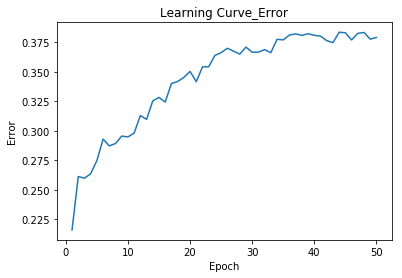

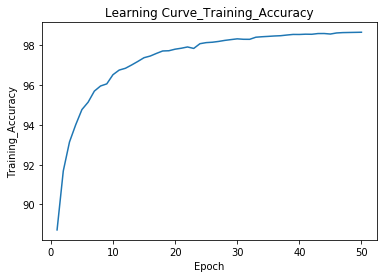

Test_Accuracy  95.52
Validation_Accuracy  95.31


In [103]:
#Your implementation goes here
from utils import *
training_data, validation_data, test_data=load_data()

from NeuralNetwork3layer import * 
my_mnist_net_3layer = NeuralNetwork3layer(784,60,30,10)
my_mnist_net_3layer.train(training_data,validation_data)


test_accuracy=my_mnist_net_3layer.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)
validation_accuracy=my_mnist_net_3layer.predict(validation_data)/100
print('Validation_Accuracy  %-2.2f' % validation_accuracy)






<div class="alert alert-info"> We noticed that the training accuracy is quite high, but the test accuracy and validation accuracy is quite high too, but the error increases with the epoch! Have question here. How could the error increases since the weights change in the direction to reduce the error. We suppose it's already overfitting.
</div>

Loading MNIST data .....
Done.
Iteration:  1/50[==============] -Error: 0.1663569306  -Training_Accuracy:  87.96  -time: 17.27 
Iteration:  2/50[==============] -Error: 0.2027203022  -Training_Accuracy:  91.43  -time: 34.49 
Iteration:  3/50[==============] -Error: 0.2205766455  -Training_Accuracy:  92.98  -time: 51.77 
Iteration:  4/50[==============] -Error: 0.2480892377  -Training_Accuracy:  93.99  -time: 69.06 
Iteration:  5/50[==============] -Error: 0.2540771894  -Training_Accuracy:  94.62  -time: 86.80 
Iteration:  6/50[==============] -Error: 0.2685322666  -Training_Accuracy:  95.21  -time: 103.92 
Iteration:  7/50[==============] -Error: 0.2863972893  -Training_Accuracy:  95.52  -time: 121.50 
Iteration:  8/50[==============] -Error: 0.3146488723  -Training_Accuracy:  95.27  -time: 139.78 
Iteration:  9/50[==============] -Error: 0.3290781694  -Training_Accuracy:  96.14  -time: 158.60 
Iteration: 10/50[==============] -Error: 0.3382587985  -Training_Accuracy:  96.19  -time: 18

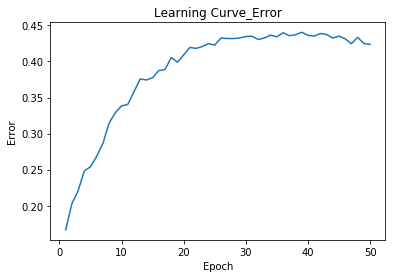

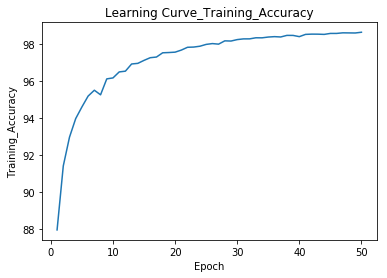

Test_Accuracy  95.33
Validation_Accuracy  95.47


In [104]:
from utils import *
training_data, validation_data, test_data=load_data()

from NeuralNetwork3layer import * 
my_mnist_net_3layer = NeuralNetwork3layer(784,45,45,10)
my_mnist_net_3layer.train(training_data,validation_data)

test_accuracy=my_mnist_net_3layer.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)
validation_accuracy=my_mnist_net_3layer.predict(validation_data)/100
print('Validation_Accuracy  %-2.2f' % validation_accuracy)

#Your answer goes here

Loading MNIST data .....
Done.
Iteration:  1/50[==============] -Error: 0.0457656294  -Training_Accuracy:  88.95  -time: 16.34 
Iteration:  2/50[==============] -Error: 0.0395369497  -Training_Accuracy:  91.61  -time: 31.16 
Iteration:  3/50[==============] -Error: 0.0454405939  -Training_Accuracy:  92.88  -time: 46.44 
Iteration:  4/50[==============] -Error: 0.0461536205  -Training_Accuracy:  93.43  -time: 61.21 
Iteration:  5/50[==============] -Error: 0.0543222820  -Training_Accuracy:  93.91  -time: 75.66 
Iteration:  6/50[==============] -Error: 0.0572939742  -Training_Accuracy:  94.51  -time: 90.28 
Iteration:  7/50[==============] -Error: 0.0599138826  -Training_Accuracy:  95.03  -time: 106.05 
Iteration:  8/50[==============] -Error: 0.0613457538  -Training_Accuracy:  95.28  -time: 121.43 
Iteration:  9/50[==============] -Error: 0.0620008653  -Training_Accuracy:  95.55  -time: 136.16 
Iteration: 10/50[==============] -Error: 0.0625460515  -Training_Accuracy:  95.58  -time: 150

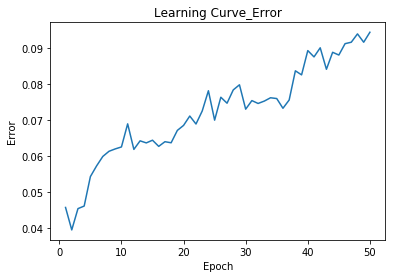

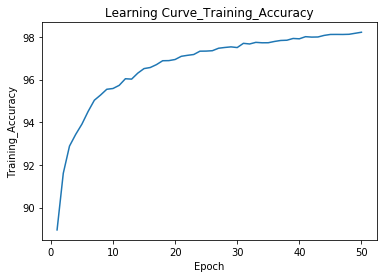

Test_Accuracy  95.14
Validation_Accuracy  95.28


In [105]:
from utils import *
training_data, validation_data, test_data=load_data()

from NeuralNetwork3layer import * 
my_mnist_net_3layer = NeuralNetwork3layer(784,30,60,10)
my_mnist_net_3layer.train(training_data,validation_data)


test_accuracy=my_mnist_net_3layer.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)
validation_accuracy=my_mnist_net_3layer.predict(validation_data)/100
print('Validation_Accuracy  %-2.2f' % validation_accuracy)

<div class="alert alert-info"> We choose three pairs of parameters to train the data, all of them has the same total number of neurons, which means the resouce taken by each model should be the same. We set them to see whether different number of neurons in each layer has influence on performance. The first one presents the model with more neurons in the first hidden layer. The second one presents the model has the same number of neurons in the two hidden layers. The third one presents the model with more neurons in the second hidden layer.  
But it turns out nearly the same.But the third one has lower error.